In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%precision 3

'%.3f'

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# cross_val_score 함수를 통해 k-fold 결과를 확인 가능

cancer = load_breast_cancer()
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

# 여기서 cross_val_score 함수의 파라미터는 순서대로 적용할 알고리즘, 설명 변수, 목표 변수, k의 수(cv 값에 해당)
# cross_val_score 함수는 5개의 점수(여기서는 정확도)를 ndarray 형태로 반환
scores = cross_val_score(tree, cancer.data, cancer.target, cv = 5)

# 모델을 선택할 때는, 기본적으로 k-fold 결과 점수의 평균이 높은 모델을 선택
# 표준편차가 큰 경우, 평균 점수에서 표준편차를 뺀 값을 기준으로 모델을 선택하기도 함
print(f"Cross validation scores: {scores}")
print(f"Cross validation scores: {scores.mean():.3f}+-{scores.std():.3f}")

Cross validation scores: [0.904 0.912 0.956 0.939 0.956]
Cross validation scores: 0.933+-0.022


In [29]:
# 연습 문제 10-1
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

cancer = load_breast_cancer()
logistic = LogisticRegression(random_state = 0, max_iter = 100, solver='liblinear')
svm = LinearSVC(max_iter = 10000)

for model in [logistic, svm]:
    scores = cross_val_score(model, cancer.data, cancer.target, cv=5)
    print(f"------------------{model.__class__.__name__}------------------")
    print(f"Cross validation scores: {scores}")
    print(f"Cross validation scores: {scores.mean():.3f} +- {scores.std():.3f}\n")

------------------LogisticRegression------------------
Cross validation scores: [0.939 0.939 0.974 0.947 0.965]
Cross validation scores: 0.953 +- 0.014



C:\Users\semin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\semin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\semin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


------------------LinearSVC------------------
Cross validation scores: [0.895 0.939 0.93  0.842 0.947]
Cross validation scores: 0.910 +- 0.039



C:\Users\semin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\semin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


최고 점수: 0.91
최고 점수에서의 하이퍼파라미터(gamma, C): (0.001, 1.0)


<AxesSubplot:xlabel='C', ylabel='gamma'>

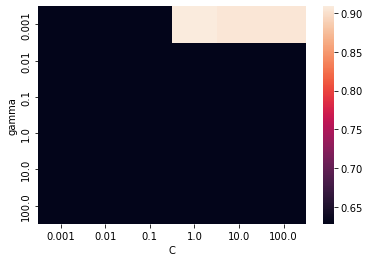

In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size = 0.5,
                                                    stratify = cancer.target, random_state = 0)

# 점수들을 딕셔너리로 저장
scores={}

for gamma in np.logspace(-3, 2, 6):
    for C in np.logspace(-3, 2, 6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, Y_train)
        scores[(gamma, C)] = svm.score(X_test, Y_test)

# max값과 해당 값에서의 조합을 알기 위해 시리즈 객체로 만듦
scores = pd.Series(scores)

print(f"최고 점수: {scores.max():.2f}")
print(f"최고 점수에서의 하이퍼파라미터(gamma, C): {scores.idxmax()}")

a = scores.unstack()
a.index.name = 'gamma'
a.columns.name = 'C'
# 세로축은 gamma, 가로축은 C
sns.heatmap(a)

In [222]:
# 클래스를 사용한 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.5,
                                                   stratify = cancer.target, random_state=0)

# GridSearchCV 클래스에 전달할 파라미터 값 지정
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3,2,6)}

# GridSearchCV 클래스 초기화
# fit 메소드 실행 시 k-fold에서 조금 더 개선된 방법을 이용
gs = GridSearchCV(estimator=SVC(), param_grid = param_grid, cv=5)

# 모든 하이퍼파라미터 조합으로 모델 검증 및 베스트 모델 구축
gs.fit(X_train, y_train)

print(f'Best cross validation score: {gs.best_score_:.3f}')
print(f'Best parameters: {gs.best_params_}')
print(f'Test score: {gs.score(X_test, y_test):.3f}')

Best cross validation score: 0.933
Best parameters: {'C': 10.0, 'gamma': 0.001}
Test score: 0.905


In [129]:
test = SVC(gamma = 0.001, C = 10.0)
scores = cross_val_score(test, X_train, y_train, cv=5)
print(f'{scores.mean():.3f}')
test.fit(X_train, y_train)
print(f'{test.score(X_test, y_test):.3f}')

0.933
0.905


In [138]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003672,2.865500e-03,0.001064,0.000972,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4
1,0.002986,2.325509e-05,0.002018,0.000028,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4
2,0.004808,5.798849e-03,0.000674,0.000606,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4
3,0.006003,6.334892e-03,0.000199,0.000398,0.001,1.0,"{'C': 0.001, 'gamma': 1.0}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4
4,0.000601,1.202202e-03,0.006798,0.008326,0.001,10.0,"{'C': 0.001, 'gamma': 10.0}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4
5,0.005883,7.037733e-03,0.000810,0.001169,0.001,100.0,"{'C': 0.001, 'gamma': 100.0}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4
6,0.003794,7.096749e-03,0.000135,0.000269,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4
7,0.000402,8.049011e-04,0.006364,0.007796,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4
8,0.001001,1.551113e-03,0.003437,0.006875,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4
9,0.007333,8.982866e-03,0.000609,0.000805,0.01,1.0,"{'C': 0.01, 'gamma': 1.0}",0.631579,0.631579,0.631579,0.614035,0.625000,0.626754,0.006851,4


In [219]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, expon, reciprocal
print(expon(scale = 4))
rs = RandomizedSearchCV(estimator=SVC(), param_distributions = param_grid, cv=5)
rs.fit(X_train,y_train)
rs.best_score_

0.933

In [226]:
# 연습 문제 10-2

cancer = load_breast_cancer()

param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)

tree = DecisionTreeClassifier(random_state=0)

gs = GridSearchCV(tree, param_grid=param_grid, cv=5)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
print(gs.score(X_test, y_test))

0.941313269493844
{'max_depth': 4, 'min_samples_leaf': 5}
0.9230769230769231


In [3]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify = cancer.target, random_state = 66)

model = SVC(gamma = 0.001, C = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# confusion_matrix(실제값, 예측값)
m = confusion_matrix(y_test, y_pred)

# 출력 형태는 열은 예측값, 행은 실제값
#         | 부정 | 긍정 |
#  ――――――――――――――――――――――
#  | 부정 |  TN  |  FP  |
#  ――――――――――――――――――――――
#  | 긍정 |  FN  |  TP  |

print(f'Confusion matrix:\n {m}')

Confusion matrix:
 [[48  5]
 [ 8 82]]


In [4]:
accuracy = (m[0, 0] + m[1,1]) / m.sum()
print(f'정확도: {accuracy:.3f}')

precision = m[1][1] / m[:,1].sum()
print(f'정밀도: {precision:.3f}')

recall = m[1][1] / m[1].sum()
print(f'재현율: {recall:.3f}')

f1 = 2*precision*recall / (precision + recall)
print(f'F1-score: {f1:.3f}')

정확도: 0.909
정밀도: 0.943
재현율: 0.911
F1-score: 0.927


In [5]:
# 사이킷런 함수를 이용해서 구현
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'정확도: {accuracy_score(y_test, y_pred):.3f}')
print(f'정밀도: {precision_score(y_test, y_pred):.3f}')
print(f'재현율: {recall_score(y_test, y_pred):.3f}')
print(f'F1-score: {f1_score(y_test, y_pred):.3f}')

정확도: 0.909
정밀도: 0.943
재현율: 0.911
F1-score: 0.927


In [6]:
# 연습 문제 10-3
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)

logistic = LogisticRegression(random_state=0, max_iter=2500)
tree = DecisionTreeClassifier(random_state=0)
for model in [logistic, tree]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'-----------------{model.__class__.__name__}-----------------')
    print(f'Confusion Matrix:\n{cm}\n')
    print(f'정확도: {accuracy_score(y_test, y_pred):.3f}')
    print(f'정밀도: {precision_score(y_test, y_pred):.3f}')
    print(f'재현율: {recall_score(y_test, y_pred):.3f}')
    print(f'F1-score: {f1_score(y_test, y_pred):.3f}\n')

-----------------LogisticRegression-----------------
Confusion Matrix:
[[49  4]
 [ 5 85]]

정확도: 0.937
정밀도: 0.955
재현율: 0.944
F1-score: 0.950

-----------------DecisionTreeClassifier-----------------
Confusion Matrix:
[[48  5]
 [ 9 81]]

정확도: 0.902
정밀도: 0.942
재현율: 0.900
F1-score: 0.920



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
# 여기에서는 악성(malignant)을 0, 양성(benign)을 1로 분류함
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=66)

model = LogisticRegression(random_state=0, solver='liblinear')
model.fit(X_train, y_train)

# LogisticRegression 클래스의 predict_proba 메소드는 0, 1과 같은 레이블이 아닌
# 각 레이블로 분류 될 확률값의 배열을 리턴
results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)
print(results.shape)
results.head()

(143, 2)


,malignant,benign
0,0.003753,0.996247
1,0.000525,0.999475
2,0.027698,0.972302
3,0.007188,0.992812
4,0.003221,0.996779


In [8]:
# 임계값을 0.4, 0.3, 0.15, 0.05로 설정한 경우를 생각
for threshold in [0.4, 0.3, 0.15, 0.05]:
    results[f'flag_{threshold}'] = results['benign'].map(lambda x:1 if x > threshold else 0)
results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.003753,0.996247,1,1,1,1
1,0.000525,0.999475,1,1,1,1
2,0.027698,0.972302,1,1,1,1
3,0.007188,0.992812,1,1,1,1
4,0.003221,0.996779,1,1,1,1
5,0.008857,0.991143,1,1,1,1
6,0.006011,0.993989,1,1,1,1
7,0.003220,0.996780,1,1,1,1
8,0.917868,0.082132,0,0,0,1
9,0.817335,0.182665,0,0,1,1


<AxesSubplot:xlabel='FPR', ylabel='TPR'>

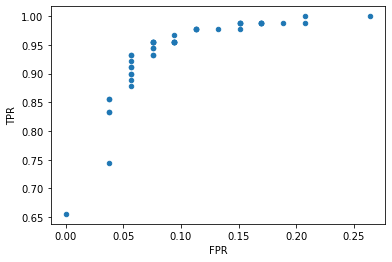

In [9]:
# 임계값이 0.01, 0.03, 0.05, ..., 0.99인 경우 
rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
    labels = results['benign'].map(lambda x:1 if x > threshold else 0)
    m = confusion_matrix(y_test, labels)
    rates[threshold] = {'FPR': m[0,1] / m[0,:].sum(),
                        'TPR': m[1,1] / m[1,:].sum()}
pd.DataFrame(rates).T.plot.scatter('FPR', 'TPR')

In [10]:
rates

{0.010: {'FPR': 0.264, 'TPR': 1.000},
 0.030: {'FPR': 0.208, 'TPR': 1.000},
 0.050: {'FPR': 0.208, 'TPR': 0.989},
 0.070: {'FPR': 0.189, 'TPR': 0.989},
 0.090: {'FPR': 0.170, 'TPR': 0.989},
 0.110: {'FPR': 0.170, 'TPR': 0.989},
 0.130: {'FPR': 0.170, 'TPR': 0.989},
 0.150: {'FPR': 0.170, 'TPR': 0.989},
 0.170: {'FPR': 0.170, 'TPR': 0.989},
 0.190: {'FPR': 0.151, 'TPR': 0.989},
 0.210: {'FPR': 0.151, 'TPR': 0.989},
 0.230: {'FPR': 0.151, 'TPR': 0.989},
 0.250: {'FPR': 0.151, 'TPR': 0.989},
 0.270: {'FPR': 0.151, 'TPR': 0.978},
 0.290: {'FPR': 0.132, 'TPR': 0.978},
 0.310: {'FPR': 0.113, 'TPR': 0.978},
 0.330: {'FPR': 0.113, 'TPR': 0.978},
 0.350: {'FPR': 0.113, 'TPR': 0.978},
 0.370: {'FPR': 0.113, 'TPR': 0.978},
 0.390: {'FPR': 0.094, 'TPR': 0.967},
 0.410: {'FPR': 0.094, 'TPR': 0.956},
 0.430: {'FPR': 0.094, 'TPR': 0.956},
 0.450: {'FPR': 0.094, 'TPR': 0.956},
 0.470: {'FPR': 0.094, 'TPR': 0.956},
 0.490: {'FPR': 0.094, 'TPR': 0.956},
 0.510: {'FPR': 0.094, 'TPR': 0.956},
 0.530: {'FP

In [11]:
pd.DataFrame(rates)

,0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19,...,0.81,0.83,0.85,0.87,0.89,0.91,0.93,0.95,0.97,0.99
FPR,0.264151,0.207547,0.207547,0.188679,0.169811,0.169811,0.169811,0.169811,0.169811,0.150943,...,0.056604,0.056604,0.056604,0.056604,0.037736,0.037736,0.037736,0.037736,0.037736,0.000000
TPR,1.000000,1.000000,0.988889,0.988889,0.988889,0.988889,0.988889,0.988889,0.988889,0.988889,...,0.900000,0.900000,0.888889,0.877778,0.855556,0.855556,0.833333,0.833333,0.744444,0.655556


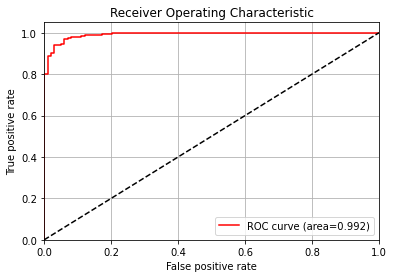

In [68]:
# 사이킷런의 roc_curve 함수를 이용해 roc 곡선 그리기
from sklearn import svm
from sklearn.metrics import roc_curve, auc

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=66, test_size=0.5)

model = svm.SVC(kernel='linear', probability = True, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='r', label=f'ROC curve (area={auc:.3f})')
plt.plot([0,1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.grid()

In [33]:
a = pd.concat([pd.DataFrame(fpr), pd.DataFrame(tpr), pd.DataFrame(threshold)], axis=1)
a.columns = ['fpr', 'tpr', 'threshold']
print(a.shape)
a.head(10)

(27, 3)


,fpr,tpr,threshold
0,0.000000,0.000000,1.999993
1,0.000000,0.005376,0.999993
2,0.000000,0.801075,0.875372
3,0.010101,0.801075,0.862806
4,0.010101,0.887097,0.798845
5,0.020202,0.887097,0.791412
6,0.020202,0.903226,0.776761
7,0.030303,0.903226,0.771323
8,0.030303,0.940860,0.709468
9,0.050505,0.940860,0.700236


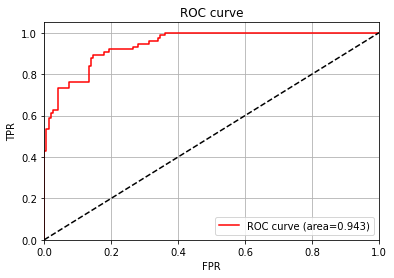

In [74]:
# 연습 문제 10-4
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

iris = load_iris()[]
y = label_binarize(iris.target, classes=[0,1,2])
X_train, X_test, y_train, y_test = train_test_split(iris.data, y, random_state=0, test_size=0.5)

model = OneVsRestClassifier(SVC(kernel ='linear', random_state = 0, probability=True))
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())
auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='r', label=f'ROC curve (area={auc:.3f})')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0,1])
plt.ylim([0, 1.05])
plt.legend(loc='best')
plt.title('ROC curve')
plt.grid()

In [75]:
y_pred

array([[3.166e-03, 3.959e-01, 9.226e-01],
       [3.896e-02, 8.235e-01, 2.730e-02],
       [9.798e-01, 4.674e-03, 9.381e-05],
       [6.041e-04, 2.954e-01, 9.392e-01],
       [9.531e-01, 7.977e-02, 9.854e-05],
       [9.065e-04, 1.192e-01, 9.908e-01],
       [9.669e-01, 5.450e-02, 8.358e-05],
       [1.637e-02, 1.541e-01, 2.956e-01],
       [1.122e-02, 3.334e-01, 2.385e-01],
       [5.222e-02, 3.593e-01, 6.927e-02],
       [2.408e-03, 6.657e-01, 7.464e-01],
       [2.611e-02, 1.265e-01, 2.696e-01],
       [1.666e-02, 4.383e-01, 2.261e-01],
       [1.507e-02, 3.439e-01, 2.405e-01],
       [1.551e-02, 3.438e-01, 3.287e-01],
       [9.695e-01, 4.780e-02, 8.008e-05],
       [2.049e-02, 3.294e-01, 2.919e-01],
       [2.466e-02, 6.516e-01, 1.741e-01],
       [9.402e-01, 2.457e-01, 8.543e-05],
       [9.741e-01, 1.147e-02, 9.970e-05],
       [6.348e-03, 4.460e-01, 7.925e-01],
       [2.319e-02, 3.073e-01, 3.834e-01],
       [9.107e-01, 1.035e-01, 2.871e-04],
       [9.414e-01, 3.745e-01, 8.94

In [83]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names)

y = pd.Series(boston.target, name='MEDV')

pd.concat([X, y], axis=1).head()
X.join(y).head()

C:\Users\semin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

boston = load_boston()
sc = StandardScaler()
X = sc.fit_transform(boston.data)
y = boston.target
scores = {}
model = {'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
         'LinearRegression': LinearRegression(),
         'LinearSVR': LinearSVR(random_state=0),
         'Ridge': Ridge(random_state=0)}

for model_name, model in model.items():
    scores[(model_name, 'MSE')] = abs(cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')).mean()
    scores[(model_name, 'MAE')] = abs(cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')).mean()
    scores[(model_name, 'MedAE')] = abs(cross_val_score(model, X, y, cv=5, scoring='neg_median_absolute_error')).mean()
    scores[(model_name, 'R2')] = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    
pd.Series(scores).unstack()

C:\Users\semin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,MAE,MSE,MedAE,R2
DecisionTreeRegressor,3.887985,36.423914,2.620000,0.263275
LinearRegression,4.249969,37.131807,3.338714,0.353276
LinearSVR,3.808910,35.179805,2.470752,0.442346
Ridge,4.224227,36.842376,3.301340,0.360686


In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=66, stratify=cancer.target)
# n_estimators 파라미터는 구축할 약한 모델의 수
models = {'KNeighborsClassifier': KNeighborsClassifier(),
          'BaggingClassifier': BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0)}
scores={}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

C:\Users\semin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\semin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,test_score,train_score
BaggingClassifier,0.937063,0.950704
KNeighborsClassifier,0.923077,0.948357


In [53]:
# 연습 문제 10-5
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0,
                                                    stratify=iris.target)

# models = {'KNeighborsClassifier': KNeighborsClassifier(),
#           'BaggingClassifier': BaggingClassifier(KNeighborsClassifier(), random_state=0, n_estimators=10,
#                                                  max_features=0.7, max_samples=0.7)}
# results = {}
# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     results[(model_name, 'train_score')] = model.score(X_train, y_train)
#     results[(model_name, 'test_score')] = model.score(X_test, y_test)
# pd.Series(results).unstack()
my_model = BaggingClassifier(KNeighborsClassifier(), random_state=0, n_estimators=10,
                                                 max_features=0.5, max_samples=0.5)
my_model.fit(X_train, y_train)
print(my_model.score(X_train, y_train))
print(my_model.score(X_test, y_test))

0.9642857142857143
1.0


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                   random_state=66)
models = {'tree': DecisionTreeRegressor(random_state=0),
          'AdaBoost': AdaBoostRegressor(DecisionTreeRegressor(), random_state=0)}

scores={}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)
    
pd.Series(scores).unstack()

C:\Users\semin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,test_score,train_score
AdaBoost,0.922829,0.999522
tree,0.721430,1.000000


In [60]:
# 연습 문제 10-6
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0, stratify = iris.target)

model = AdaBoostClassifier(n_estimators=50, random_state=0)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9553571428571429
0.9473684210526315


In [3]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=66)

models = {'RandomForestRegressor': RandomForestRegressor(random_state=0),
          'GradientBoostingRegressor': GradientBoostingRegressor(random_state=0)}

scores={}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)
    
pd.Series(scores).unstack()

C:\Users\semin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,test,train
GradientBoostingRegressor,0.926076,0.977138
RandomForestRegressor,0.894637,0.979374


<AxesSubplot:>

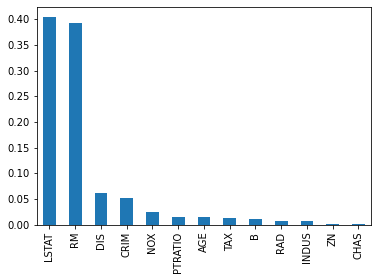

In [15]:
s = pd.Series(models['RandomForestRegressor'].feature_importances_, index = boston.feature_names)
s.sort_values(ascending=False).plot.bar(color='C0')

In [5]:
# 연습 문제 10-7
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0, stratify=iris.target)

models={'RandomForestClassifier': RandomForestClassifier(random_state=0),
        'GradientBoostingClassifier': GradientBoostingClassifier(random_state=0)}

accuracy = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy[(model_name, 'train')] = model.score(X_train, y_train)
    accuracy[(model_name, 'test')] = model.score(X_test, y_test)
    
pd.Series(accuracy).unstack()

,test,train
GradientBoostingClassifier,0.973684,1.0
RandomForestClassifier,0.947368,1.0


In [23]:
# 종합문제 10-2
# 유방암 데이터를 이용해 로지스틱 회귀, SVM, 의사결정나무, K-NN, 랜덤 포레스트, 그레이디언트 부스팅 등의 모델을 구축하고,
# 교차검증(5겹) 방법으로 가장 좋은 모델을 선정해보기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score

cancer = load_breast_cancer()
models = {'LogisticRegression': LogisticRegression(random_state=0),
          'SVM': LinearSVC(random_state=0),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'RandomForestClassifier': RandomForestClassifier(random_state=0),
          'GradientBoostingClassifier': GradientBoostingClassifier(random_state=0)}

accuracy = {}
for model_name, model in models.items():
    accuracy[(model_name, 'mean_accuracy')] = cross_val_score(model, cancer.data, cancer.target, cv=5).mean()
    
print(f"best model: {pd.Series(accuracy).unstack()['mean_accuracy'].idxmax()}")
pd.Series(accuracy).unstack()

C:\Users\semin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\semin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

best model: RandomForestClassifier


,mean_accuracy
GradientBoostingClassifier,0.961372
KNeighborsClassifier,0.927946
LogisticRegression,0.947291
RandomForestClassifier,0.963111
SVM,0.920944
